In [2]:
from ComputeTransitionProbabilities import compute_transition_probabilities
from Const import Const
import scipy.sparse as sp
import numpy as np

In [3]:
C = Const()
P_dense = compute_transition_probabilities(C)

shape (16590, 16590, 3)


In [4]:
P = []
for l in range(C.L):
    rows, cols = np.where(P_dense[:, :, l] != 0)
    data = P_dense[rows, cols, l]
    P.append(sp.csr_matrix((data, (rows, cols)), shape=(C.K, C.K)))
    
print([p.shape for p in P])

[(16590, 16590), (16590, 16590), (16590, 16590)]


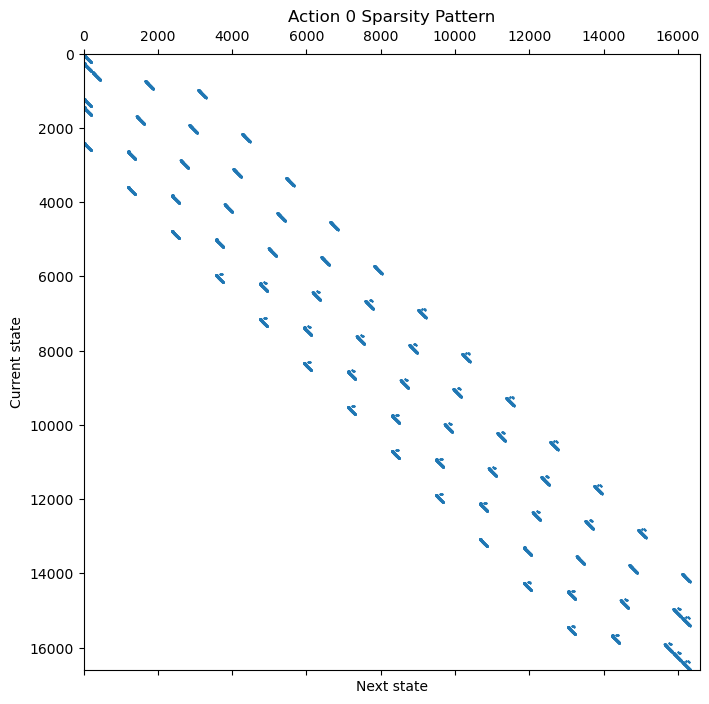

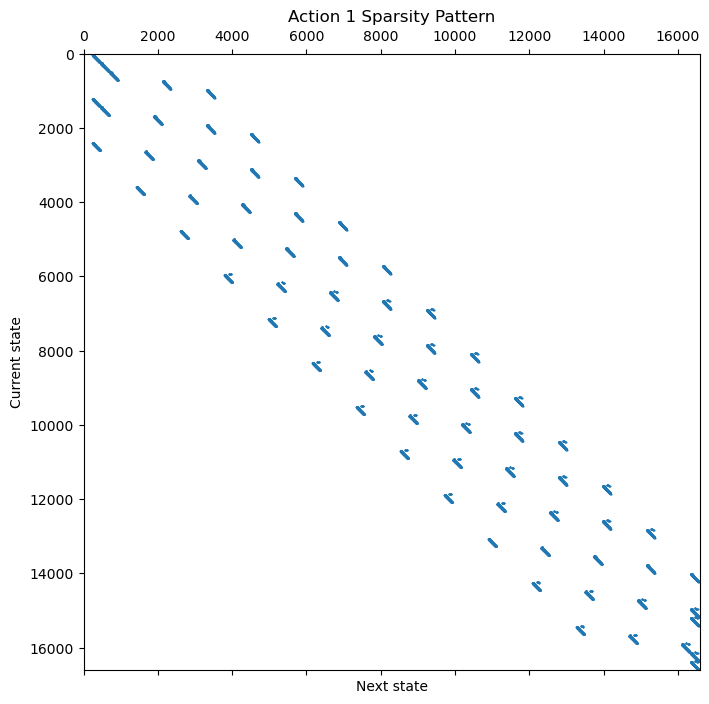

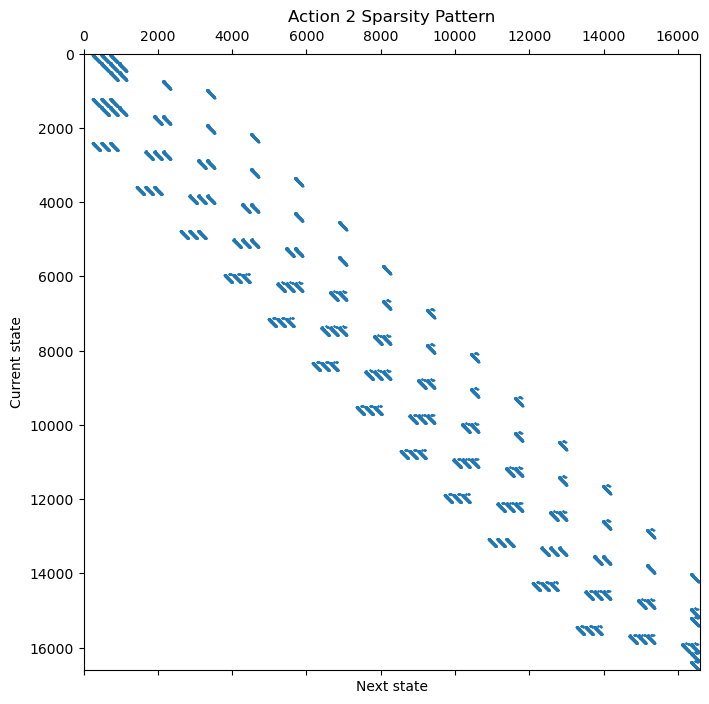

In [5]:
import matplotlib.pyplot as plt


for l in range(C.L):
    plt.figure(figsize=(8, 8))
    plt.spy(P[l], markersize=0.5)  # visualize sparsity
    plt.title(f"Action {l} Sparsity Pattern")
    plt.xlabel("Next state")
    plt.ylabel("Current state")
    plt.show()

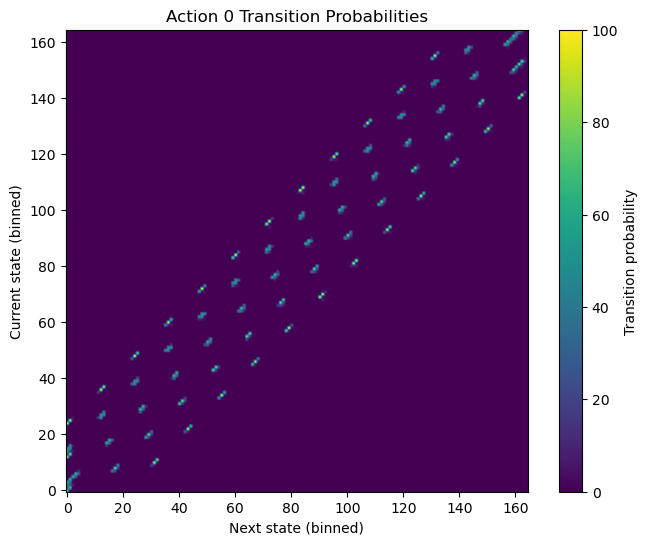

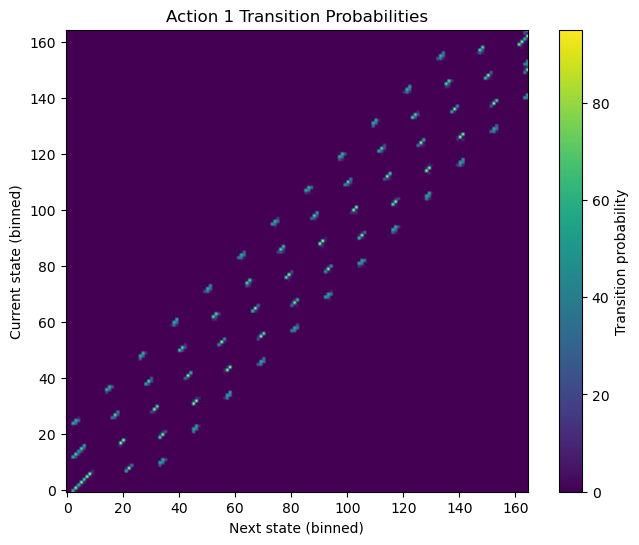

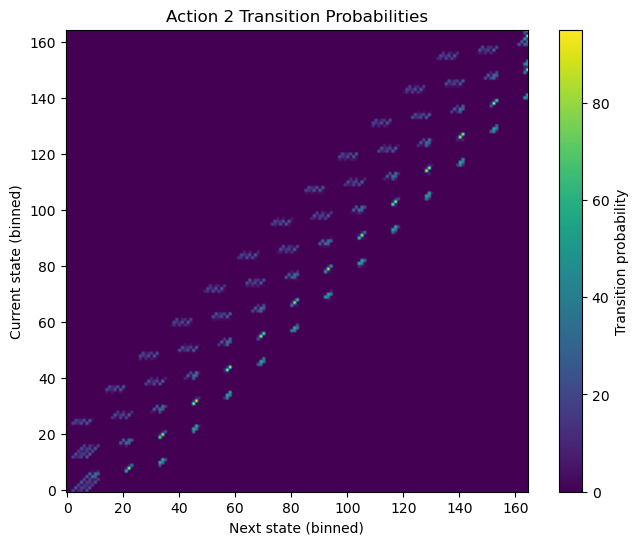

In [6]:
def sparse_block_average(P_sparse, block_size):
    n = P_sparse.shape[0]
    m = n // block_size
    result = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            block = P_sparse[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size]
            result[i, j] = block.sum()  # sum of probabilities in block
    return result

block_size = 100  # adjust for resolution
for l in range(C.L):
    P_block = sparse_block_average(P[l], block_size)
    
    plt.figure(figsize=(8, 6))
    im = plt.imshow(P_block, cmap='viridis', origin='lower')
    plt.colorbar(im, label='Transition probability')
    plt.title(f'Action {l} Transition Probabilities')
    plt.xlabel('Next state (binned)')
    plt.ylabel('Current state (binned)')
    plt.show()


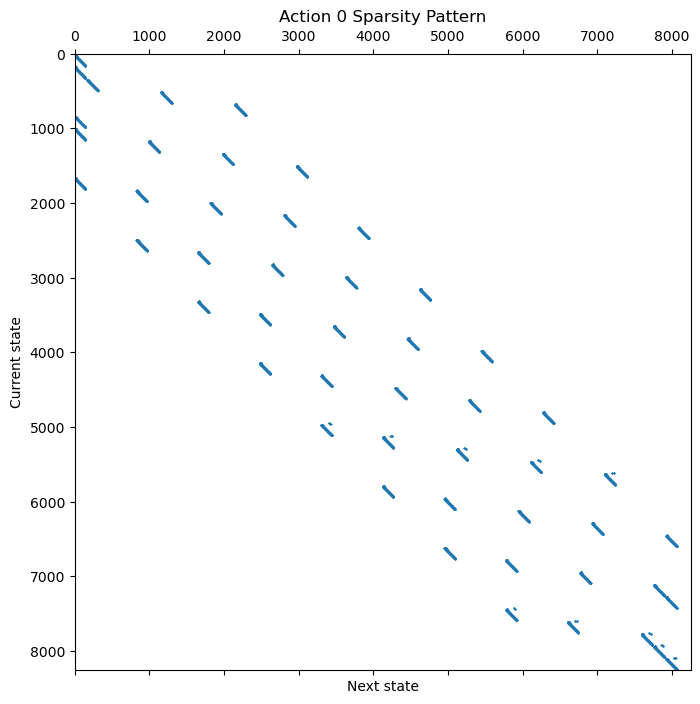

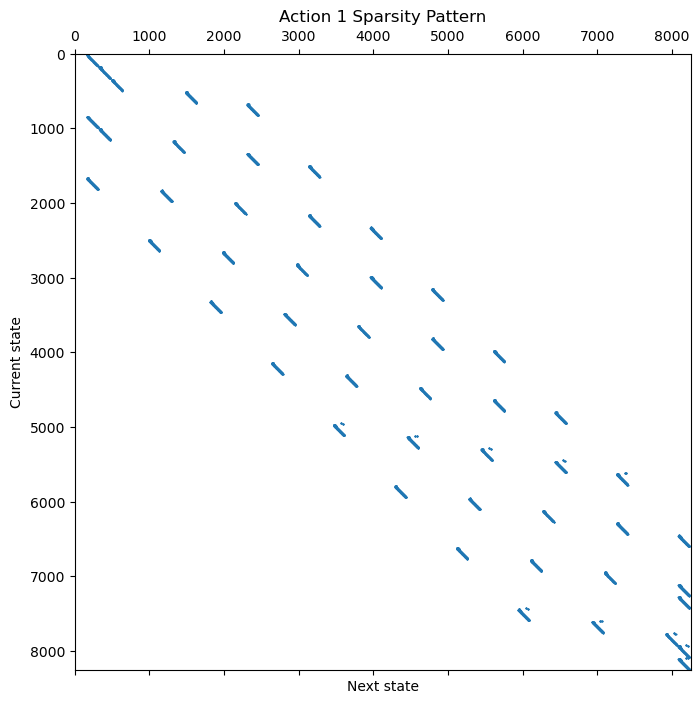

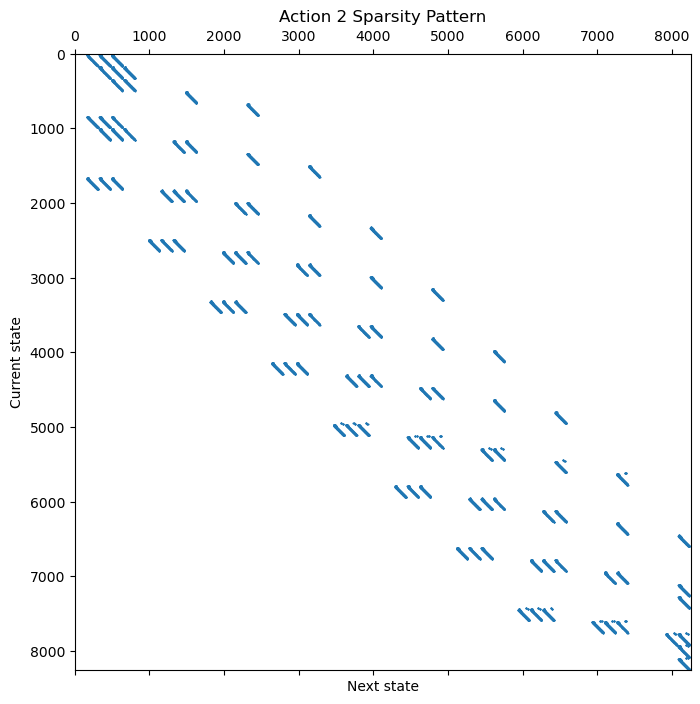

In [7]:

gold = np.load(f"tests/test{3}.npz")
P = gold["P"]

for l in range(C.L):
    plt.figure(figsize=(8, 8))
    plt.spy(P[:, :, l], markersize=0.5)  # visualize sparsity
    plt.title(f"Action {l} Sparsity Pattern")
    plt.xlabel("Next state")
    plt.ylabel("Current state")
    plt.show()

In [8]:
C = Const()
enumerate(C.state_space)
